In [216]:
import pandas as pd
import numpy as np

In [217]:
# load the training data and test data

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
all = pd.concat([train, test])

print("Number of training examples: ", train.shape[0])
print("Training shape: ", train.shape, "\n")
print("Number of test examples: ", test.shape[0])
print("Test shape: ", test.shape, "\n")

print("Columns in training data: ", train.columns.values)

Number of training examples:  891
Training shape:  (891, 12) 

Number of test examples:  418
Test shape:  (418, 11) 

Columns in training data:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [218]:
train.head()
train.info()
train.sample(3)
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [219]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [220]:
### Missing values
def display_missing(df):
    for col in df.columns.tolist():
        if df[col].isnull().sum() != 0:
            print(f'{col} column missing values:{df[col].isnull().sum()}')
    print('\n')

display_missing(train)
display_missing(test)

Age column missing values:177
Cabin column missing values:687
Embarked column missing values:2


Age column missing values:86
Fare column missing values:1
Cabin column missing values:327




<Axes: xlabel='Sex', ylabel='Survived'>

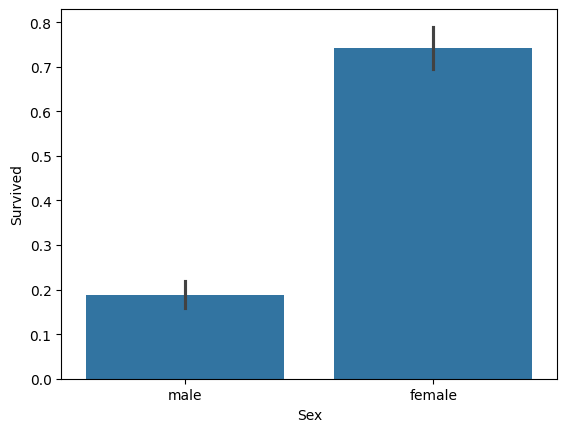

In [221]:
# visualisation
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=train)


<Axes: xlabel='Pclass', ylabel='Survived'>

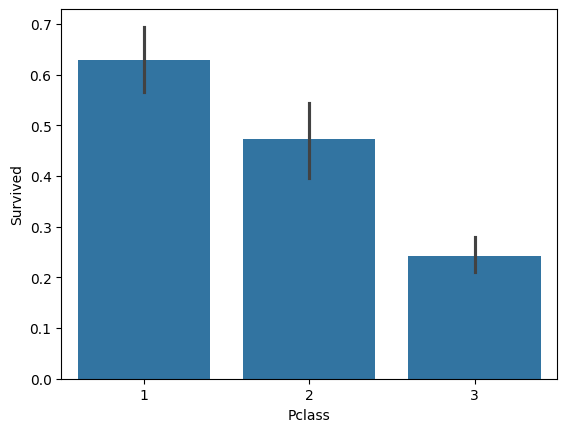

In [222]:
sns.barplot(x='Pclass', y='Survived', data=train)


<Axes: xlabel='SibSp', ylabel='Survived'>

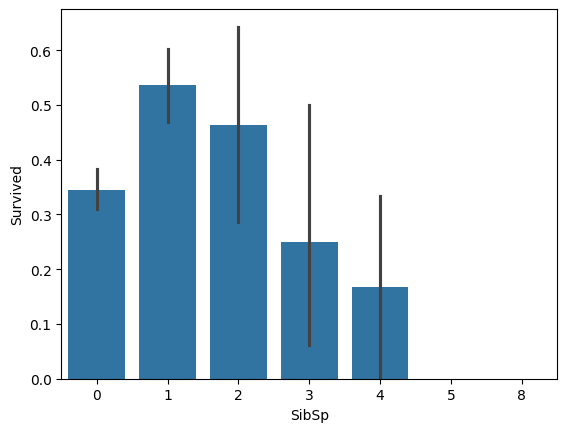

In [223]:
sns.barplot(x='SibSp', y='Survived', data=train)

<Axes: xlabel='Parch', ylabel='Survived'>

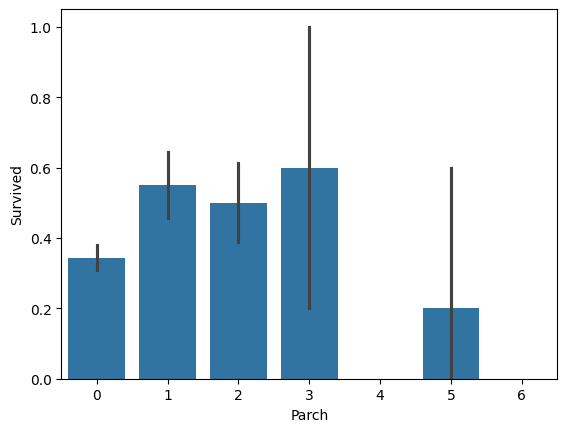

In [224]:
sns.barplot(x='Parch', y='Survived', data=train)

In [225]:
# Drop the cabin feature because it is missing a lot of the data
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

train.drop("Ticket", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)



In [226]:
# fill in the embarked feature
print("Number of people embarking in Southampton (S): ", len(train[train["Embarked"] == "S"]))
print("Number of people embarking in Cherbourg (C): ", len(train[train["Embarked"] == "C"]))
print("Number of people embarking in Queenstown (Q): ", len(train[train["Embarked"] == "Q"]))

# Since the majority of people embarked in Southampton (S), we assign the missing values in Embarked to be S
train["Embarked"] = train["Embarked"].fillna("S")


Number of people embarking in Southampton (S):  644
Number of people embarking in Cherbourg (C):  168
Number of people embarking in Queenstown (Q):  77


In [227]:
# predictin missing age values
combine = [train, test]
for df in combine:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#print(train['Title'].value_counts())
print(train['Title'].unique())
print(test['Title'].unique())

# replace various titles with more common names
for df in combine:
    df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [228]:

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for df in combine:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)


age_mapping = {1:train[train['Title'] == 1]['Age'].median(),2:train[train['Title'] == 2]['Age'].median(),3:train[train['Title'] == 3]['Age'].median(),4:train[train['Title'] == 4]['Age'].median(),5:train[train['Title'] == 5]['Age'].median(),6:train[train['Title'] == 6]['Age'].median()}

for df in combine:
    df['Age'].fillna(df['Title'].map(age_mapping), inplace=True)

train['Age'].isna().sum()


0

In [229]:
# Drop the name feature
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)


In [230]:
# sex feature
sex_mapping = {"male":0,'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [231]:
# Embarked feature
embarked_mapping = {"S":1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,3
2,3,1,3,1,26.0,0,0,7.9250,1,2
3,4,1,1,1,35.0,1,0,53.1000,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,1


In [232]:
# Fare feature
train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,3,1
1,893,3,1,47.0,1,0,7.0000,1,3
2,894,2,0,62.0,0,0,9.6875,3,1
3,895,3,0,27.0,0,0,8.6625,1,1
4,896,3,1,22.0,1,1,12.2875,1,3


In [233]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train,x_val,y_train,y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [234]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(randomforest.score(x_val, y_val) * 100, 2)
print(acc_randomforest)

84.77


In [235]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(gbk.score(x_val, y_val) * 100, 2)
print(acc_gbk)

85.28


In [236]:
test.columns.values

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'], dtype=object)

In [237]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'], dtype=object)

In [238]:
ids = test['PassengerId']
test.drop('PassengerId', axis=1, inplace=True)
predictions = gbk.predict(test)

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)